In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('prosperLoanData.csv')

In [3]:
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [4]:
df['LoanStatus'].unique()

array(['Completed', 'Current', 'Past Due (1-15 days)', 'Defaulted',
       'Chargedoff', 'Past Due (16-30 days)', 'Cancelled',
       'Past Due (61-90 days)', 'Past Due (31-60 days)',
       'Past Due (91-120 days)', 'FinalPaymentInProgress',
       'Past Due (>120 days)'], dtype=object)

In [6]:
df['LoanStatus'].value_counts()

LoanStatus
Current                   56576
Completed                 38074
Chargedoff                11992
Defaulted                  5018
Past Due (1-15 days)        806
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      205
Past Due (>120 days)         16
Cancelled                     5
Name: count, dtype: int64

If past due > 90 days we it will be considered a default(1), else non-default(0), Canceled will be dropped hard to say what it means and there is only 5 of them 

In [5]:
values_to_make_ones = ['Past Due (91-120 days)', 'Past Due (>120 days)', 'Defaulted', 'Chargedoff']

In [11]:
df = df[df['LoanStatus'] != 'Cancelled']

In [22]:
df['Defaulted'] = np.where(df['LoanStatus'].isin(values_to_make_ones),1,0)

<Axes: xlabel='Defaulted', ylabel='percent'>

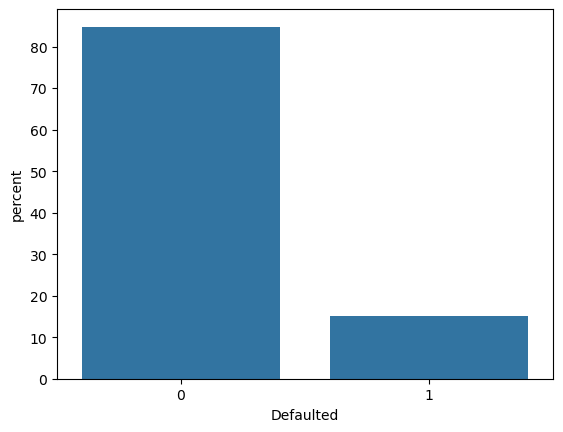

In [24]:
sns.countplot(data=df,x="Defaulted", stat='percent',)

In [35]:
missing_percents = (df.isna().sum().sort_values(ascending=False))/len(df) 

If missing values are greater than 20%, the column will be dropped, imputing without introducing a high level of bias would be very hard.

In [47]:
print(missing_percents[missing_percents >= 0.2])
list_of_cols_missing_more_than25 = list(missing_percents[missing_percents >= 0.2].index)

GroupKey                               0.882913
LoanFirstDefaultedCycleNumber          0.851209
ScorexChangeAtTimeOfListing            0.833866
TotalProsperPaymentsBilled             0.806156
ProsperPaymentsOneMonthPlusLate        0.806156
ProsperPaymentsLessThanOneMonthLate    0.806156
ProsperPrincipalOutstanding            0.806156
ProsperPrincipalBorrowed               0.806156
TotalProsperLoans                      0.806156
OnTimeProsperPayments                  0.806156
CreditGrade                            0.745919
ClosedDate                             0.516519
EstimatedEffectiveYield                0.255231
EstimatedLoss                          0.255231
EstimatedReturn                        0.255231
ProsperRating (numeric)                0.255231
ProsperRating (Alpha)                  0.255231
ProsperScore                           0.255231
dtype: float64


In [45]:
df = df.drop(list_of_cols_missing_more_than25,axis=1)

In [52]:
missing_percents = (df.isna().sum().sort_values(ascending=False))/len(df)
print(missing_percents[missing_percents > 0])

DebtToIncomeRatio                     0.075080
EmploymentStatusDuration              0.066891
AmountDelinquent                      0.066864
BankcardUtilization                   0.066706
OpenCreditLines                       0.066706
CurrentCreditLines                    0.066706
RevolvingCreditBalance                0.066706
PublicRecordsLast12Months             0.066706
TotalTrades                           0.066180
AvailableBankcardCredit               0.066180
TradesOpenedLast6Months               0.066180
TradesNeverDelinquent (percentage)    0.066180
BorrowerState                         0.048380
Occupation                            0.031466
EmploymentStatus                      0.019766
TotalInquiries                        0.010138
DelinquenciesLast7Years               0.008663
CurrentDelinquencies                  0.006109
FirstRecordedCreditLine               0.006109
TotalCreditLinespast7years            0.006109
PublicRecordsLast10Years              0.006109
InquiriesLast